<a href="https://colab.research.google.com/github/lee-seong-wook/DAELIM/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EC%88%98%EC%97%85_3%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels)= fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
print(train_images.shape)
print(train_labels)
print(test_images.shape)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


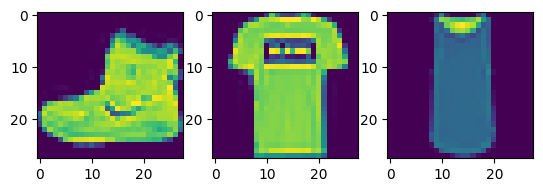

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1)#1행 3열의 첫번째 사진을 출력
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.imshow(train_images[0])
ax2.imshow(train_images[1])
ax3.imshow(train_images[2])
plt.show()

In [ ]:
print(train_labels[:3])

[9 0 0]


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'), #사람이 조정하는건 하이퍼 파라미터 , 기계가 조정하는건 파라미터
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', #주로 하는 역할은 미분이다 optimizer함수는
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images,train_labels, epochs=15) #batch size 고정값은 32 이다.

Epoch 1/15
1875/1875 [==============================] - 8s 3ms/step - loss: 1.8224 - accuracy: 0.4227
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0983 - accuracy: 0.5348
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8969 - accuracy: 0.6329
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6508 - accuracy: 0.7414
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5765 - accuracy: 0.7710
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4976 - accuracy: 0.8336
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4325 - accuracy: 0.8483
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3991 - accuracy: 0.8592
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3824 - accuracy: 0.8640
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.375

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2) #verbose는 0으로 하면 학습할때 아무것도 출력x default는 1로 되어있다. evaluate 함수를 사용하면 모델의 최종적인 정답률과 loss 값을 알 수 있다.
print('\n테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.4054 - accuracy: 0.8564 - 733ms/epoch - 2ms/step

테스트 정확도: 0.8564000129699707


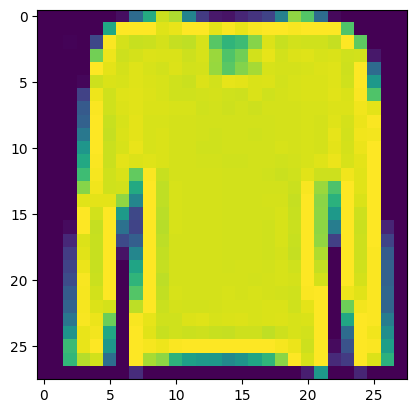

In [ ]:
import numpy as np
randIdx = np.random.randint(0,1000)
plt.imshow(test_images[randIdx])

In [ ]:
yhat = model.predict(test_images[randIdx][np.newaxis,:,:]) #차원 수를 늘려준것
yhat

1/1 [==============================] - 0s 59ms/step


array([[0.04017717, 0.00463144, 0.71933377, 0.0180585 , 0.03957219,
        0.00426749, 0.16312452, 0.00299653, 0.00683228, 0.00100606]],
      dtype=float32)

In [ ]:
class_names = ['T_shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
yhat = np.argmax(model.predict(test_images[randIdx][np.newaxis,:,:])) #argmax는 값이 가장큰것
print(class_names[yhat])

1/1 [==============================] - 0s 17ms/step
Pullover


In [ ]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'), #사람이 조정하는건 하이퍼 파라미터 , 기계가 조정하는건 파라미터
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(13, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', #주로 하는 역할은 미분이다 optimizer함수는
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.fit(train_images,train_labels, epochs=15, batch_size=128)

Epoch 1/15
469/469 [==============================] - 5s 6ms/step - loss: 0.2618 - accuracy: 0.9041
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.2504 - accuracy: 0.9062
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2480 - accuracy: 0.9078
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2435 - accuracy: 0.9093
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2416 - accuracy: 0.9096
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2344 - accuracy: 0.9140
Epoch 7/15
469/469 [==============================] - 3s 6ms/step - loss: 0.2262 - accuracy: 0.9161
Epoch 8/15
469/469 [==============================] - 2s 5ms/step - loss: 0.2224 - accuracy: 0.9173
Epoch 9/15
469/469 [==============================] - 3s 6ms/step - loss: 0.2270 - accuracy: 0.9165
Epoch 10/15
469/469 [==============================] - 3s 6ms/step - loss: 0.2175 - accuracy: 0.9187

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 13)                221       
                                                                 
 dense_19 (Dense)            (None, 10)               

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2) #verbose는 0으로 하면 학습할때 아무것도 출력x default는 1로 되어있다.
print('\n테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.3767 - accuracy: 0.8826 - 837ms/epoch - 3ms/step

테스트 정확도: 0.8826000094413757


In [ ]:
yhat_2 = model.predict(test_images[randIdx][np.newaxis,:,:]) #차원 수를 늘려준것
yhat_2

1/1 [==============================] - 0s 97ms/step


array([[5.6409603e-01, 1.3110453e-02, 2.5643942e-01, 2.2946557e-04,
        3.0091747e-03, 3.3684313e-02, 1.1514078e-01, 1.4971384e-06,
        1.4284418e-02, 4.4899789e-06]], dtype=float32)

In [ ]:
pred_1 = model.predict(test_images)
pred_2= model2.predict(test_images)
pred_1,pred_2

In [ ]:
y_hat1 = np.argmax(pred_1, axis=1) #1차원이다.
y_hat2 = np.argmax(pred_2, axis=1)
y_hat1,y_hat2

(array([9, 2, 1, ..., 8, 1, 5]), array([6, 5, 7, ..., 5, 5, 5]))

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat1= confusion_matrix(test_labels, y_hat1)
conf_mat2= confusion_matrix(test_labels, y_hat2)
plt.matshow(conf_mat1)
plt.matshow(conf_mat2)